<a href="https://colab.research.google.com/github/neethj/feature-engineering/blob/main/handling_missing_datapart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#how to handle categorical features


###frequent category imputation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train (3).csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [ ]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean( )

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

### illustration of the num of values of the features

In [ ]:
## for getting the index values of the features
df['BsmtQual'].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

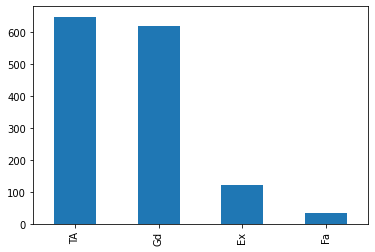

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

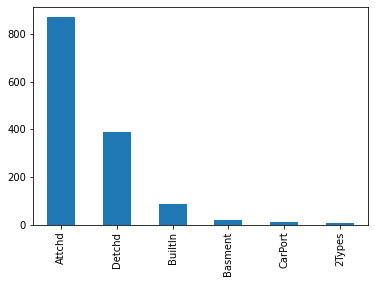

In [ ]:
df["GarageType"].value_counts().plot.bar()

## function for imputation

In [ ]:
## we have to replace the missing values with the most frequent data, for the BsmntQual , the most frequent one is TA, so we find the index value of it 
## and then fill it in the NaN values

In [ ]:
df["BsmtQual"].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [ ]:
df["BsmtQual"].value_counts().index[0]
##most frequent feature

'TA'

In [ ]:
def impute_nan(df,variable):
  most_frequent_variable = df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_variable, inplace=True)

In [ ]:
for feature in ["BsmtQual","GarageType"]:
  impute_nan(df,feature)

In [ ]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [ ]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

### so when we applied imputation on the features BsmtQual and GarageType, both its null values have been filled with the most frequent values.
this method only can be used when the missing values are less in number, for FireplaceQu we dont want to use this method as it has lot of missing values and it will distort and produce biased result

##### ADVANTAGES
easy to implement, fast

##### Disadvantages
It may lead to over usage of high frequent labels if there are many missing values
It distorts the relationship between the most frequent label



## variable to capture NAN

In [ ]:
df = pd.read_csv("/content/train (3).csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [ ]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,bsmtQual_VAR
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [ ]:
df["bsmtQual_VAR"]= np.where(df["BsmtQual"].isnull(),1,0)

In [ ]:
most_frequent=df["BsmtQual"].mode()[0]

In [ ]:
df["BsmtQual"].fillna(most_frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,bsmtQual_VAR,FireplaceQu_VAR
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [ ]:
df["FireplaceQu_VAR"]=np.where(df["FireplaceQu"].isnull(),1,0)

In [ ]:
most_frequent=df["FireplaceQu"].mode()[0]

In [ ]:
df["FireplaceQu"].fillna(most_frequent,inplace=True)

In [ ]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice,bsmtQual_VAR,FireplaceQu_VAR
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


In [ ]:
## here the prpblem is more columns will get created and this is called curse of dimensionality

### method where we make NaN as a newcategory, this works when there are frequent categories

In [5]:
df = pd.read_csv("/content/train (3).csv", usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [6]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
def impute(df,variable):
   df[variable+"_new"]=np.where(df[variable].isnull(),"unknown",df[variable])

In [8]:
impute(df,"FireplaceQu")

In [9]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_new
0,Gd,NaN,Attchd,208500,unknown
1,Gd,TA,Attchd,181500,TA
2,Gd,TA,Attchd,223500,TA
3,TA,Gd,Detchd,140000,Gd
4,Gd,TA,Attchd,250000,TA


so what ppl will do is that,either they replace the missing values in the columns, or they will create a new column like we have done above,, then after that we will drop the old column, here we will get rid of fireplacequ bcos that is the column we have updated for this method.

In [15]:
df = df.drop(['FireplaceQu'], axis=1)

In [16]:
df.head()

,BsmtQual,GarageType,SalePrice,FireplaceQu_new
0,Gd,Attchd,208500,unknown
1,Gd,Attchd,181500,TA
2,Gd,Attchd,223500,TA
3,TA,Detchd,140000,Gd
4,Gd,Attchd,250000,TA
